In [1]:
import numpy as np
import pandas as pd

In [18]:
dataset = pd.read_csv('home_data.csv')

In [19]:
dataset.shape

(21613, 21)

In [20]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [86]:
X = dataset.iloc[:,3:-4].values
y = dataset['price'].values

In [87]:
X[0]

array([3.0000e+00, 1.0000e+00, 1.1800e+03, 5.6500e+03, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00, 1.1800e+03,
       0.0000e+00, 1.9550e+03, 0.0000e+00, 9.8178e+04])

In [49]:
y[0]

221900

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [89]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.reshape(-1,1))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [90]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [98]:
n = len(x_train)
X0 = np.ones(n)
# newX = np.array([X0,x_train[:,0],x_train[:,1], x_train[:,2]])
newX = [X0]

In [99]:
x_train.shape

(16209, 14)

In [100]:
for i in range(x_train.shape[1]):
    newX.append(x_train[:,i])

In [102]:
newX[1]

array([-0.39873715, -0.39873715,  0.67648506, ..., -0.39873715,
        0.67648506,  0.67648506])

In [103]:
len(newX[1])

16209

In [104]:
len(newX)

15

In [106]:
newX = np.asarray(newX)

In [107]:
newX.shape

(15, 16209)

In [108]:
newX = newX.T

In [109]:
newX.shape

(16209, 15)

In [111]:
newX[:1]

array([[ 1.        , -0.39873715,  0.50022075, -0.07610871, -0.30951487,
         0.93650577, -0.08717263, -0.30575946, -0.62918687,  0.29191561,
        -0.48110645,  0.74224374,  1.463768  , -0.21012839, -0.91469793]])

In [112]:
b = np.zeros(newX.shape[1])

In [113]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
def cost_function(X,y,b):
    return np.sum((X.dot(b) - y) ** 2) / (2*n)

In [115]:
cost_function(newX,y,b)

10806.499999999965

In [116]:
def gradient_descent(X,y,b,epochs,alpha):
    costHistory = [0] * epochs
    for epoch in range(epochs):
        y_pred = X.dot(b)
        loss = y_pred - y
        grad = (1/n) * X.T.dot(loss)
        b = b - alpha * grad
        costHistory[epoch] = cost_function(newX,y,b)
    return costHistory, b

In [126]:
b = np.zeros(newX.shape[1])
epochs = 2000
alpha = 0.003
cost, b = gradient_descent(newX,y_train.flatten(),b,epochs,alpha)

In [127]:
cost[0]

0.49574294702485605

In [128]:
cost[-1]

0.17504743307056125

In [129]:
import matplotlib.pyplot as plt

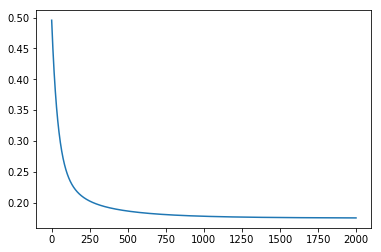

In [130]:
x = [i for i in range(epochs)]
plt.plot(x,cost)

In [136]:
final_pred = newX.dot(b)

In [137]:
final_pred

array([-0.27679976, -0.51997742, -0.0472522 , ...,  0.40544308,
       -0.45712294,  0.57398326])

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(y_train,final_pred)

0.3500948661411225